# Consumers Purchase Intention Towards Online Shopping

## SECTION 2 - Exploratory Data Analysis

***The goal of this section is to understands and analyze consumers' behavior to predict Revenue Generated or not from Customer's Online Purchasing from E-Commerce.*** 

We have to analyze each feature, especially each feature against our target variable, Revenue. So, we can find out and predict what features can provide the potential for greater revenue due to the final consumer decision to make a product purchase.

In [123]:
## Data Analysis Phase
import pandas as pd
import numpy as np

# Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv('Final Project Clean.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [125]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int64  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int64  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int64  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  float64
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  int64  
 12  Browser                  11248 non-null  int64  
 13  Region                   11248 non-null  int64  
 14  TrafficType           

Pertama - tama kita akan mulai EDA melalui target variable dahulu, setelah itu kita lakukan EDA ke seluruh variablenya. Ini dilakukan untuk mengetahui gambaran umum dan pola dari pemesan sehingga tujuan awal dari ujian ini dapat tercapai.

In [126]:
rev = df['Revenue'].value_counts()[1]
no_rev = df['Revenue'].value_counts()[0]

print(f'TOTAL REVENUE : {rev} |', f'TOTAL NO REVENUE : {no_rev}')

TOTAL REVENUE : 1619 | TOTAL NO REVENUE : 9629


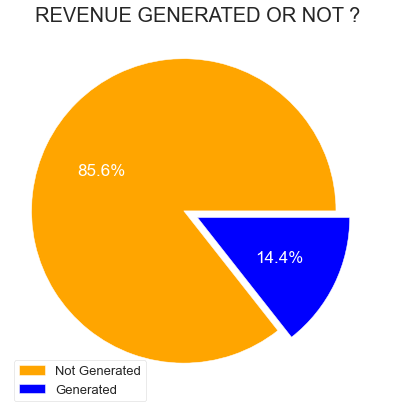

In [127]:
plt.figure(figsize = (8,7))
plt.title('REVENUE GENERATED OR NOT ?', fontsize = 20)

colors = ['orange', 'blue']
labels = 'Not Generated', 'Generated'

plt.pie(df['Revenue'].value_counts(), autopct = '%.1f%%', colors = colors, 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

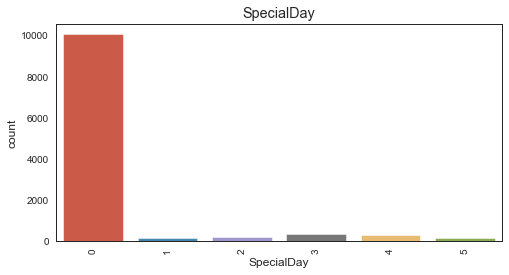

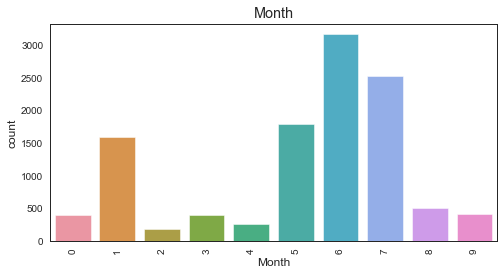

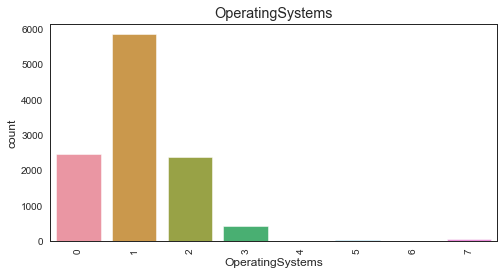

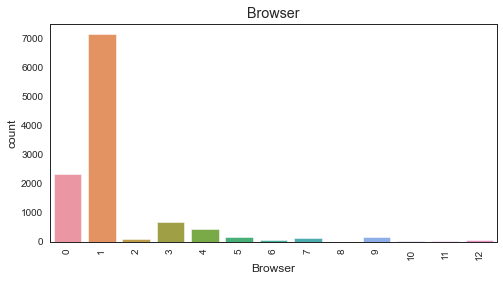

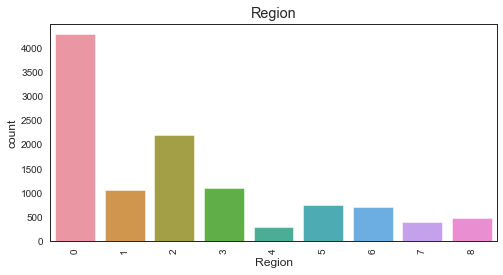

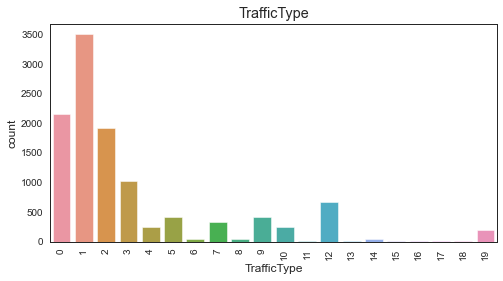

In [42]:
#Plot categorical data
#y = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
y = list(df.dtypes[df.dtypes == 'object'].index)

for i in y:
    plt.figure(figsize=(8,4))
    plt.title(i)
    sns.countplot(data = df, x = i)
    plt.xticks(rotation=90)
    plt.show()

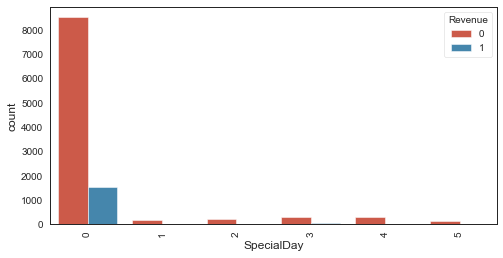

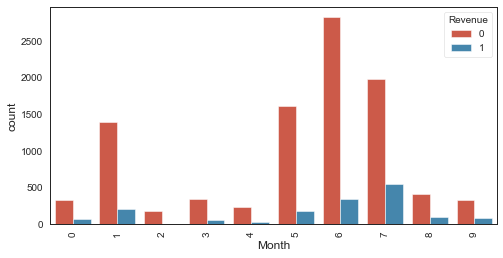

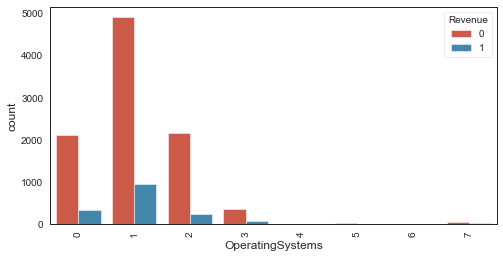

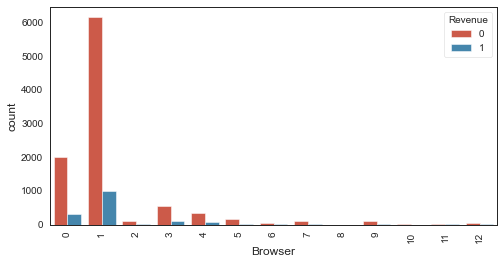

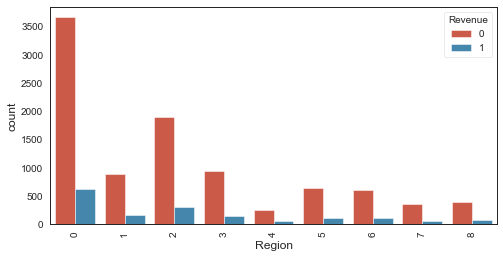

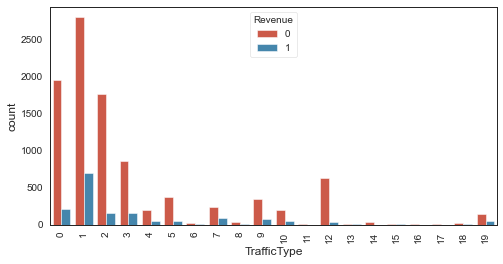

In [43]:
#Plot categorical data wrt 'Revenue'
for i in y:
    plt.figure(figsize=(8,4))
    sns.countplot(data = df,hue = 'Revenue', x = i)
    plt.xticks(rotation=90)
    plt.show()

In [44]:
df.Revenue.value_counts()

0    9629
1    1619
Name: Revenue, dtype: int64

In [45]:
for features in y:
    dropp = list(df[features].value_counts()[df[features].value_counts()/len(df)*100<1].index)
    for j in dropp:
        df.drop(df.index[df[features]==j], inplace = True)

In [46]:
df.Revenue.value_counts()

0    9262
1    1568
Name: Revenue, dtype: int64

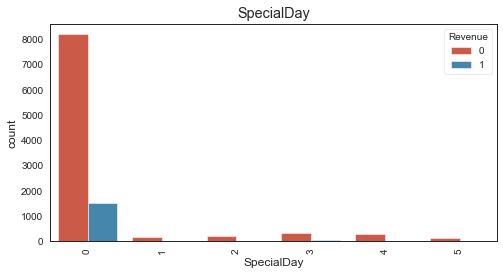

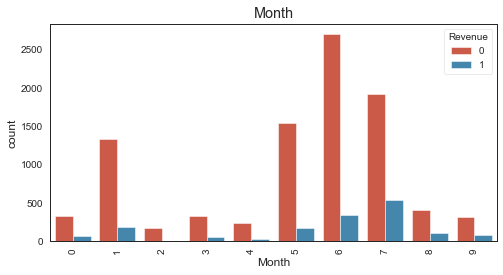

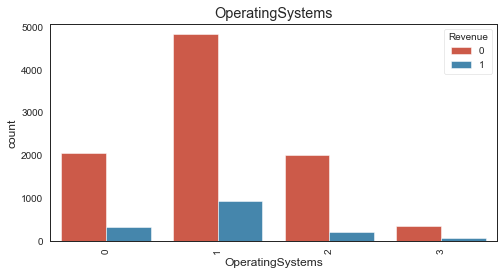

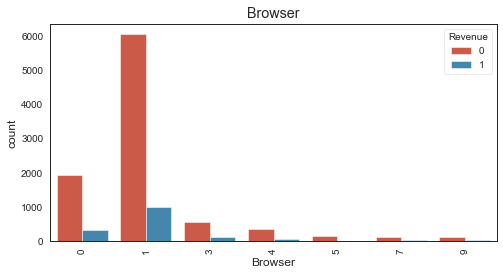

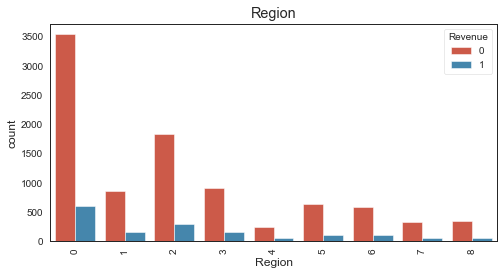

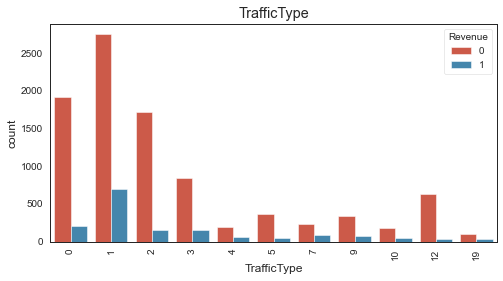

In [47]:
for i in y:
    plt.figure(figsize=(8,4))
    plt.title(i)
    sns.countplot(data = df, x = i,hue = 'Revenue')
    plt.xticks(rotation=90)
    plt.show()

<font color=blue>Few observations,
    
<font color = blue> 1. There is hardly any shopping on or the day's approching any special day
    
<font color = blue> 2. May, November, March and December have peak season. There are 2 opportunity windows for giving any special days to attract consumers, March - May and November - December
    
<font color = blue> 3. Even if on surface it looks like there is more sale during Weekdays, but during Weekends customers seem to buy more with respect to visiting the site. so, it depends on customer's needs and their leisure time to visit E-commerce website.
    
<font color = blue> 4. Browser 2, seems to have a lot of potential. Most of customers using browser 2 to visit the website, so it would be nice if we can knows the type of Browser 2.

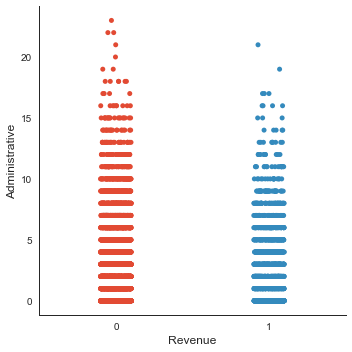

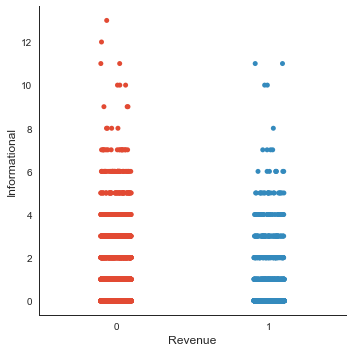

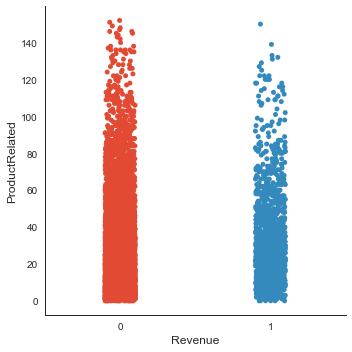

In [52]:
y =  ['Administrative', 'Informational', 'ProductRelated']

for feat in y:
    ax = sns.catplot(x="Revenue", y=feat , data=df)

### ATTRACTIVE VISUALIZATION

### Feature Selection

In [7]:
# categorical feature
df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [8]:
#int features
df['Administrative'] = df['Administrative'].astype('int')
df['Informational'] = df['Informational'].astype('int')
df['ProductRelated'] = df['ProductRelated'].astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Administrative           11248 non-null  int64 
 1   Administrative_Duration  11248 non-null  int64 
 2   Informational            11248 non-null  int64 
 3   Informational_Duration   11248 non-null  int64 
 4   ProductRelated           11248 non-null  int64 
 5   ProductRelated_Duration  11248 non-null  int64 
 6   BounceRates              11248 non-null  int64 
 7   ExitRates                11248 non-null  int64 
 8   PageValues               11248 non-null  int64 
 9   SpecialDay               11248 non-null  object
 10  Month                    11248 non-null  object
 11  OperatingSystems         11248 non-null  object
 12  Browser                  11248 non-null  object
 13  Region                   11248 non-null  object
 14  TrafficType              11248 non-nul

In [10]:
minmax = pd.DataFrame(df.iloc[:, list(range(10))].min())
minmax['Max'] = df.iloc[:, list(range(10))].max()
minmax.columns = ['Min', 'Max']
minmax

,Min,Max
Administrative,0,23
Administrative_Duration,0,2849
Informational,0,13
Informational_Duration,0,974
ProductRelated,0,152
ProductRelated_Duration,0,8600
BounceRates,0,1328
ExitRates,0,3898
PageValues,0,2220
SpecialDay,0,5


In [11]:
df.shape

(11248, 18)

### Uni-Variate Analysis of the Data

#### univariate analysis is a way to determine the relationship of each feature and understand the distribution of data for each feature.

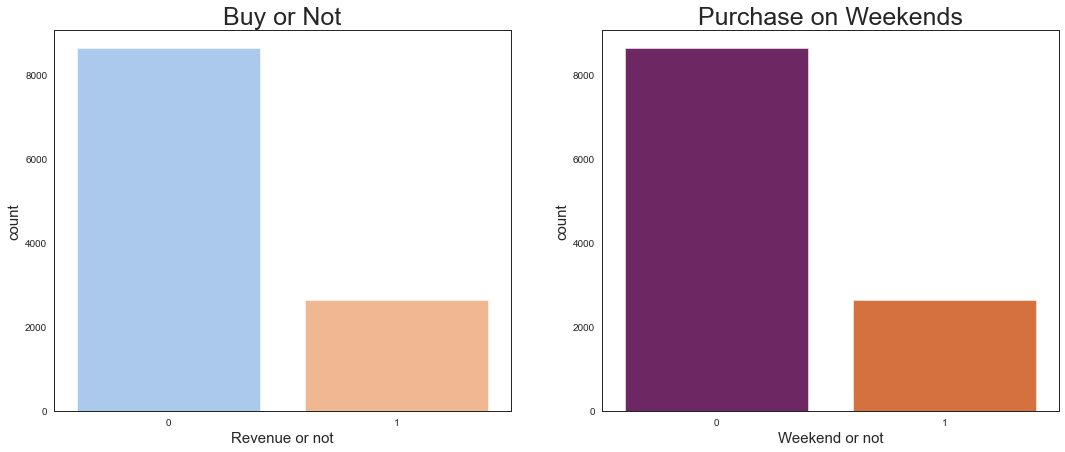

In [12]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 25)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 25)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.savefig('2.1.png')

plt.show()

In [13]:
df['VisitorType'].value_counts()

2    9496
0    1674
1      78
Name: VisitorType, dtype: int64

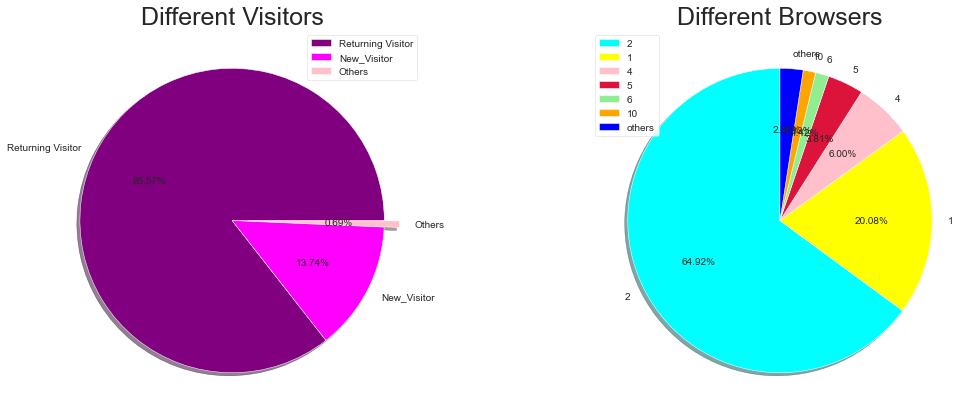

In [14]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['purple', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 25)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['cyan', 'yellow', 'pink', 'crimson', 'lightgreen', 'orange', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 25)
plt.axis('off')
plt.legend()
plt.savefig('2.2.png')


plt.show()

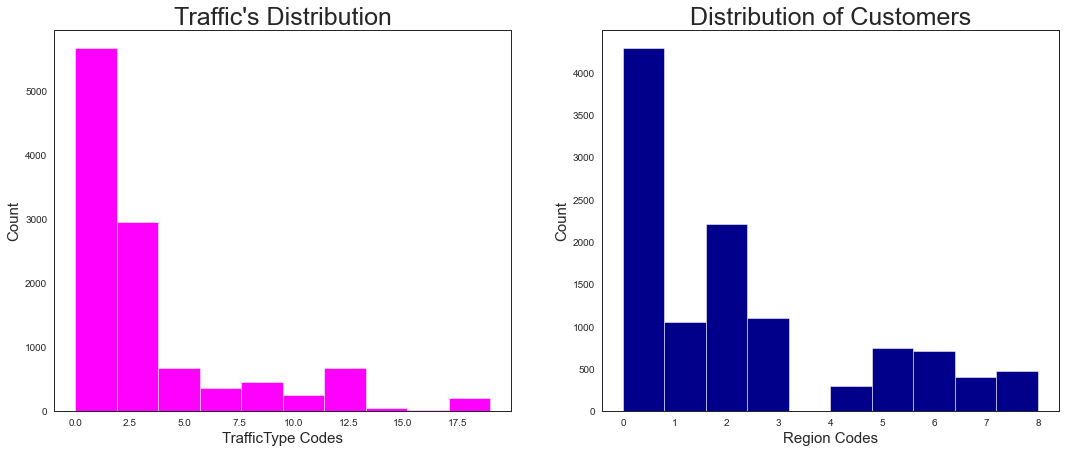

In [15]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'magenta')
plt.title("Traffic's Distribution",fontsize = 25)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(df['Region'], color = 'darkblue')
plt.title('Distribution of Customers',fontsize = 25)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('2.3.png')

plt.show()

In [16]:
# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

1    5859
0    2454
2    2392
3     440
7      73
5      18
6       6
4       6
Name: OperatingSystems, dtype: int64

In [17]:
#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()

6    3170
7    2527
5    1794
1    1598
8     509
9     412
0     399
3     398
4     262
2     179
Name: Month, dtype: int64

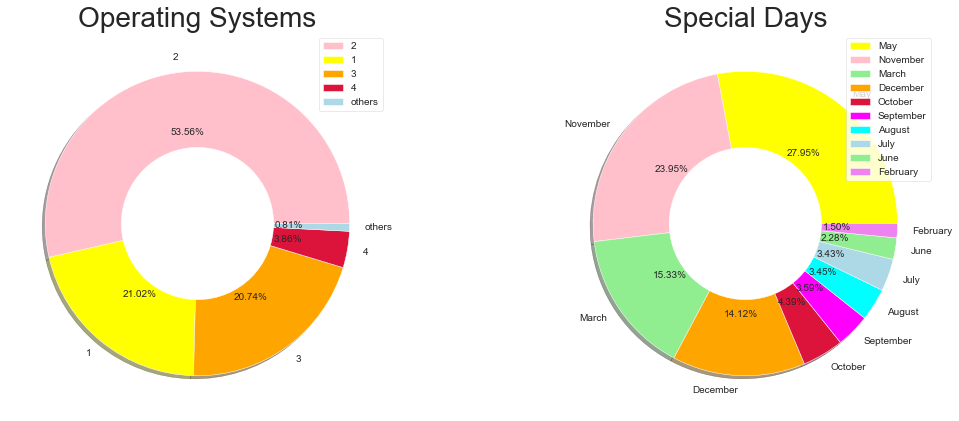

In [18]:
# creating a donut chart for the months variations

size = [6599, 2590, 2555, 476, 100]
colors = ['pink', 'yellow', 'orange', 'crimson', 'lightblue']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Operating Systems', fontsize = 28)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3500, 3000, 1920, 1768, 550, 450, 432, 430, 286, 188]
colors = ['yellow', 'pink', 'lightgreen', 'orange', 'crimson', 'magenta', 'cyan', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 28)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.savefig('2.4.png')

plt.show()

### Bi-Variate Analysis

#### Bi-variate analysis is a way to determine the relationship of each feature, understand the distribution of data on each feature, and see the relationship between the feature itself and its target variable, Revenue.

#### Using Categorical Data

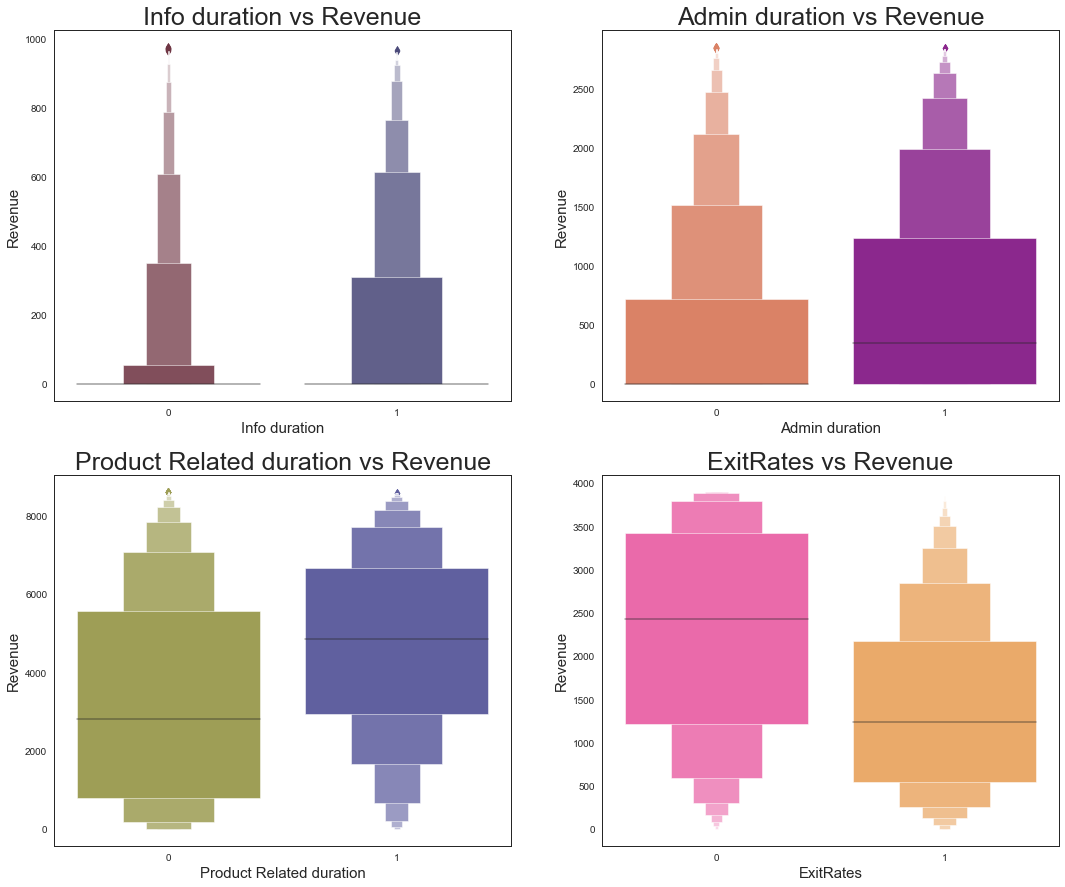

In [19]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'icefire_r')
plt.title('Info duration vs Revenue', fontsize = 25)
plt.xlabel('Info duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'plasma_r')
plt.title('Admin duration vs Revenue', fontsize = 25)
plt.xlabel('Admin duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'gist_stern_r')
plt.title('Product Related duration vs Revenue', fontsize = 25)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 25)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.savefig('3.1.png')

plt.show()

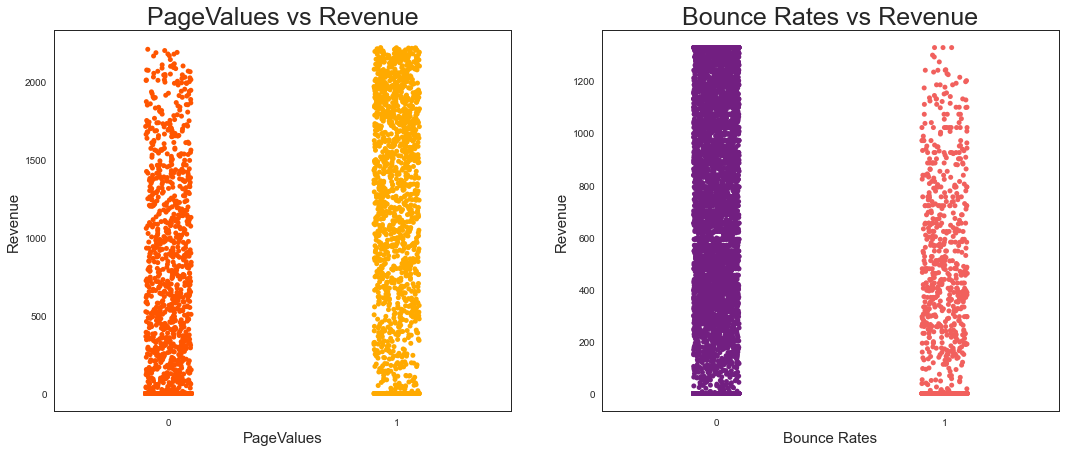

In [20]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 25)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 25)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.savefig('3.2.png')

plt.show()

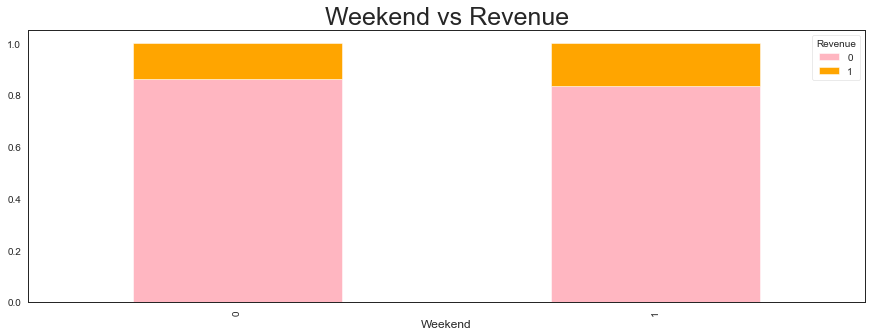

In [21]:
# weekend vs Revenue

df2 = pd.crosstab(df['Weekend'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'orange'])
plt.title('Weekend vs Revenue', fontsize = 25)
plt.savefig('3.3.png')

plt.show()

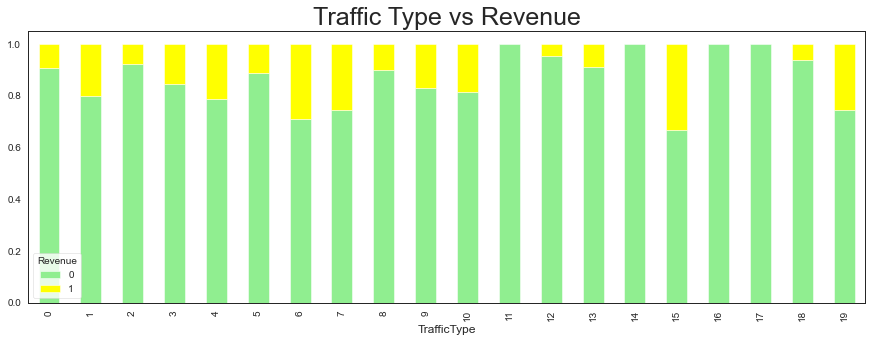

In [22]:
# Traffic Type vs Revenue

df3 = pd.crosstab(df['TrafficType'], df['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.savefig('3.4.png')

plt.show()

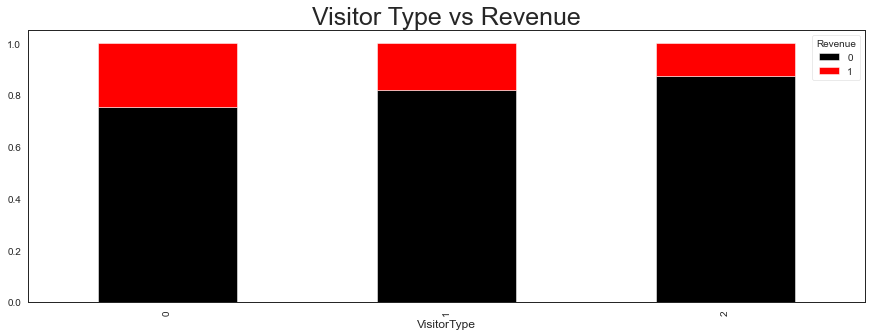

In [23]:
# visitor type vs revenue

df4 = pd.crosstab(df['VisitorType'], df['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['black', 'red'])
plt.title('Visitor Type vs Revenue', fontsize = 25)
plt.savefig('3.5.png')

plt.show()

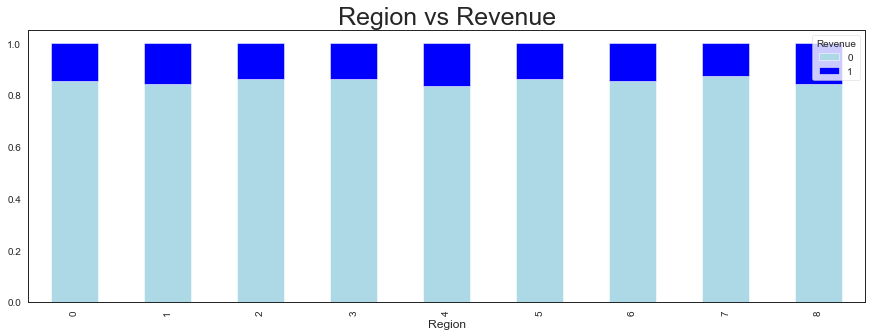

In [24]:
# region vs Revenue

df5 = pd.crosstab(df['Region'], df['Revenue'])
df5.div(df5.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 25)
plt.savefig('3.6.png')

plt.show()

### Multi-Variate Analysis

#### Multivariate analysis is used to study more complex sets of data than what univariate analysis methods can handle. 

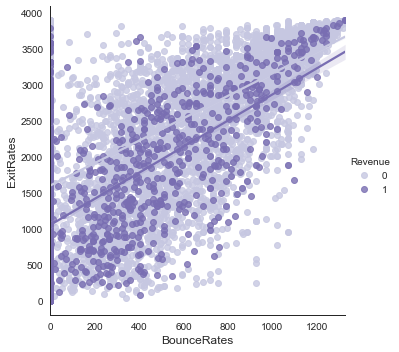

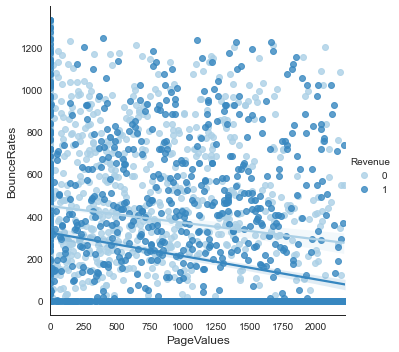

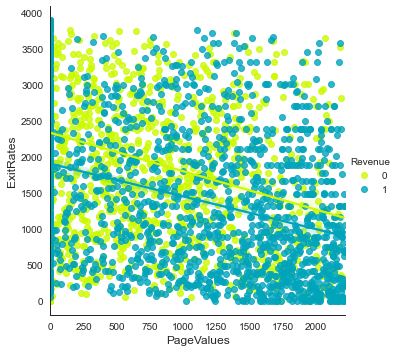

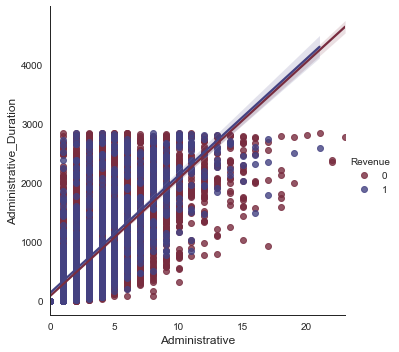

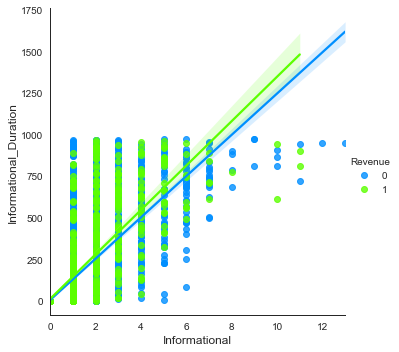

In [25]:
ax1 = sns.lmplot('BounceRates','ExitRates',hue='Revenue', data=df, palette='Purples')
ax2 = sns.lmplot('PageValues','BounceRates',hue='Revenue', data=df, palette='Blues')
ax3 = sns.lmplot('PageValues','ExitRates', hue='Revenue', data=df, palette='nipy_spectral_r')
ax4 = sns.lmplot('Administrative', 'Administrative_Duration', hue='Revenue', data=df, palette='icefire_r')
ax5 = sns.lmplot('Informational', 'Informational_Duration', hue='Revenue', data=df, palette='gist_rainbow_r')
plt.savefig('4.1.png')

plt.show()

><font color=blue> Exit Rates and Bounce Rates are positively correlated with the correlation coefficient of 0.90.
><font color=blue>Bounce Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.

><font color=blue> Exit Rates and Page Values are negatively correlated. As the page value increases, exit rates decreases and vice-versa.

><font color=blue> Administrative Pages and Administrative Duration, Informational and Informational Duration, Product Related and Product Related Duration are positively correlated.

><font color=blue> On administrative pages 2 to 15 such as login, logout, password recovery, profile, email wish list etc., visitors have spent more than 500 seconds (approx. 8 minutes) which is generally quite higher than normal. It suggests that visitors are having trouble logging in or it’s taking too much time to process the request.

><font color=blue> Even though customers/visitors have spent a large amount of time on product related pages but the revenue generation is very low. There are certain outliers who did spent more than 30000 seconds (approx. 8 Hours) but still didn’t make any transaction.

><font color=blue> With increasing Page Values, the revenue generation is more. There are certain pages which have very less page values which need to be improved in order to generate revenue.

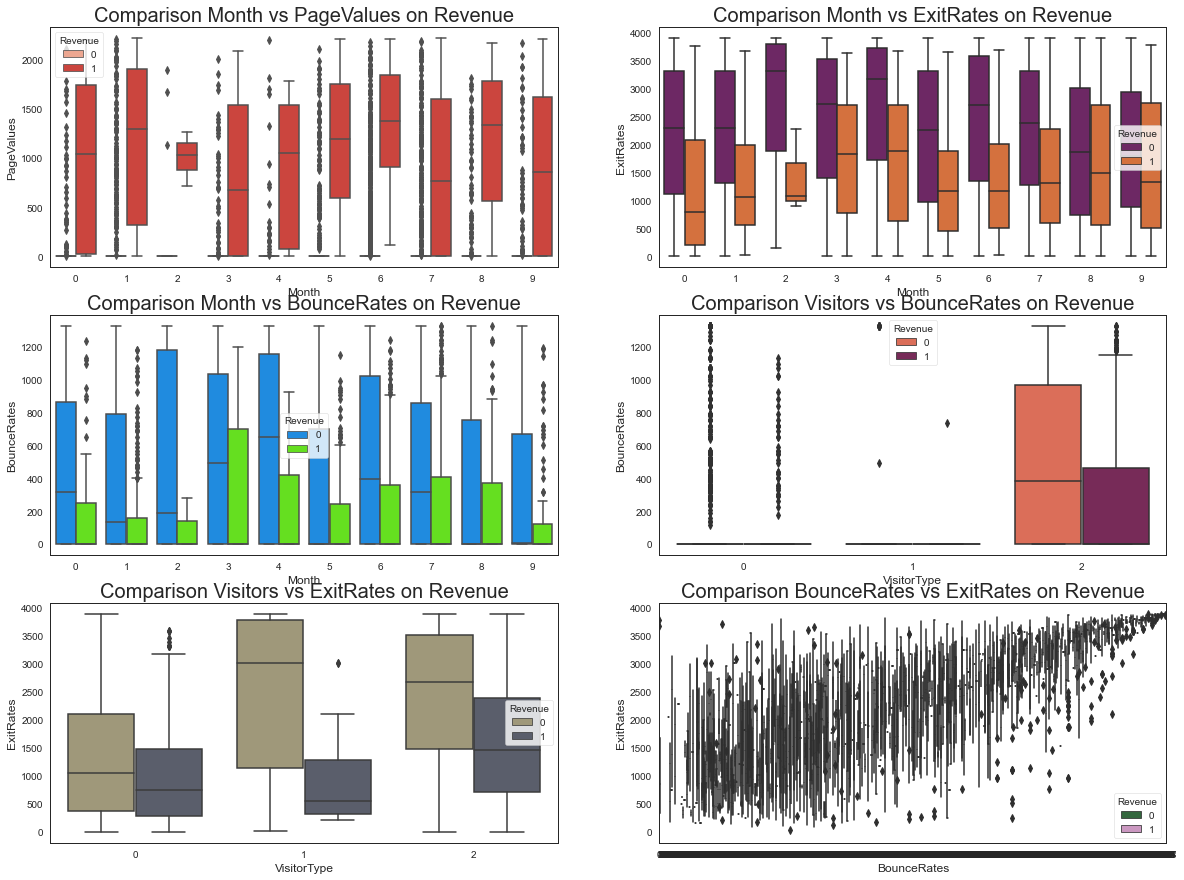

In [26]:
# month vs pagevalues with respect to revenue

plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(3, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'Reds')
plt.title('Comparison Month vs PageValues on Revenue', fontsize = 20)

# month vs exitrates with respect to revenue
plt.subplot(3, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'inferno')
plt.title('Comparison Month vs ExitRates on Revenue', fontsize = 20)

# month vs bouncerates with respect to revenue
plt.subplot(3, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'gist_rainbow_r')
plt.title('Comparison Month vs BounceRates on Revenue', fontsize = 20)

# visitor type vs Bounce rates with respect to revenue
plt.subplot(3, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'rocket_r')
plt.title('Comparison Visitors vs BounceRates on Revenue', fontsize = 20)

# visitor type vs Exit rates with respect to revenue
plt.subplot(3, 2, 5)
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'cividis_r')
plt.title('Comparison Visitors vs ExitRates on Revenue', fontsize = 20)

# Bounce Rates vs Exit rates with respect to revenue
plt.subplot(3, 2, 6)
sns.boxplot(x = df['BounceRates'], y = df['ExitRates'], hue = df['Revenue'], palette = 'cubehelix')
plt.title('Comparison BounceRates vs ExitRates on Revenue', fontsize = 20)
plt.savefig('4.2.png')

plt.show()

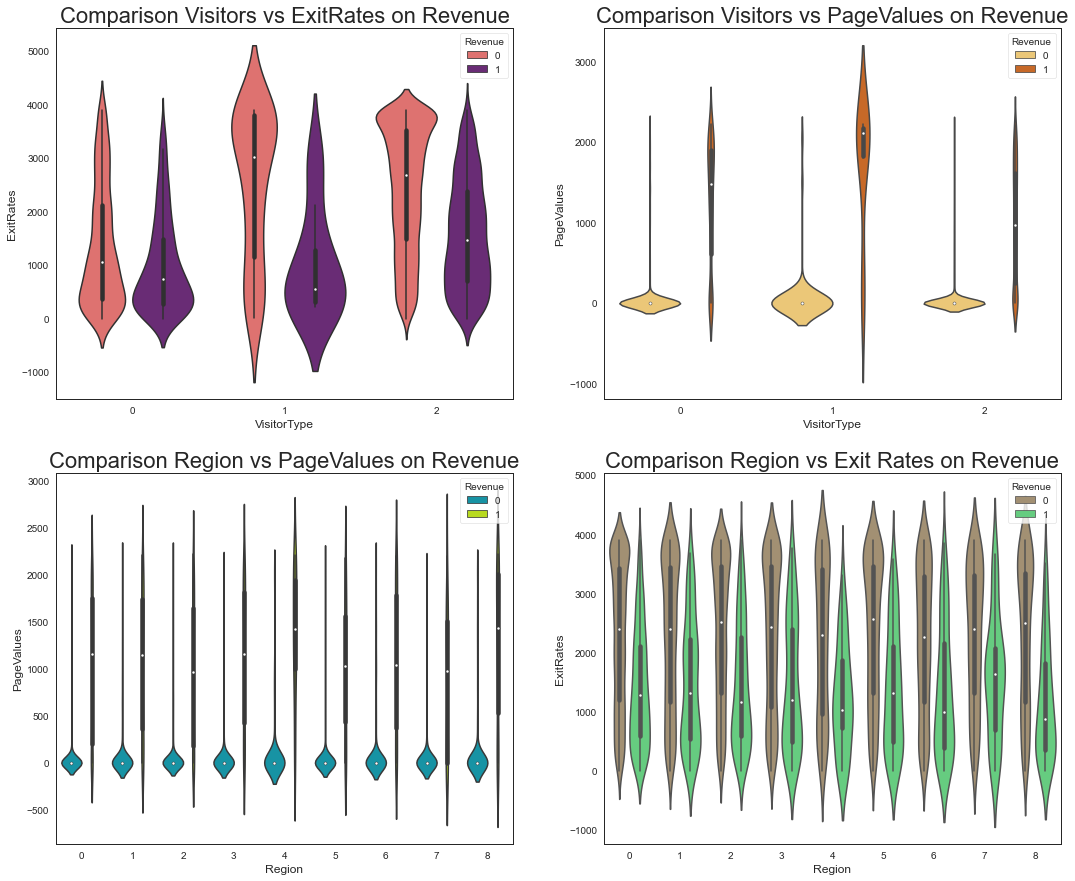

In [28]:
# visitor type vs exit rates with respect to revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'magma_r')
plt.title('Comparison Visitors vs ExitRates on Revenue', fontsize = 22)

# visitor type vs exit rates with respect to revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'YlOrBr')
plt.title('Comparison Visitors vs PageValues on Revenue', fontsize = 22)

# region vs pagevalues with respect to revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'nipy_spectral')
plt.title('Comparison Region vs PageValues on Revenue', fontsize = 22)

#region vs exit rates with respect to revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'terrain_r')
plt.title('Comparison Region vs Exit Rates on Revenue', fontsize = 22)
plt.savefig('4.4.png')

plt.show()

### Relationship between Variables

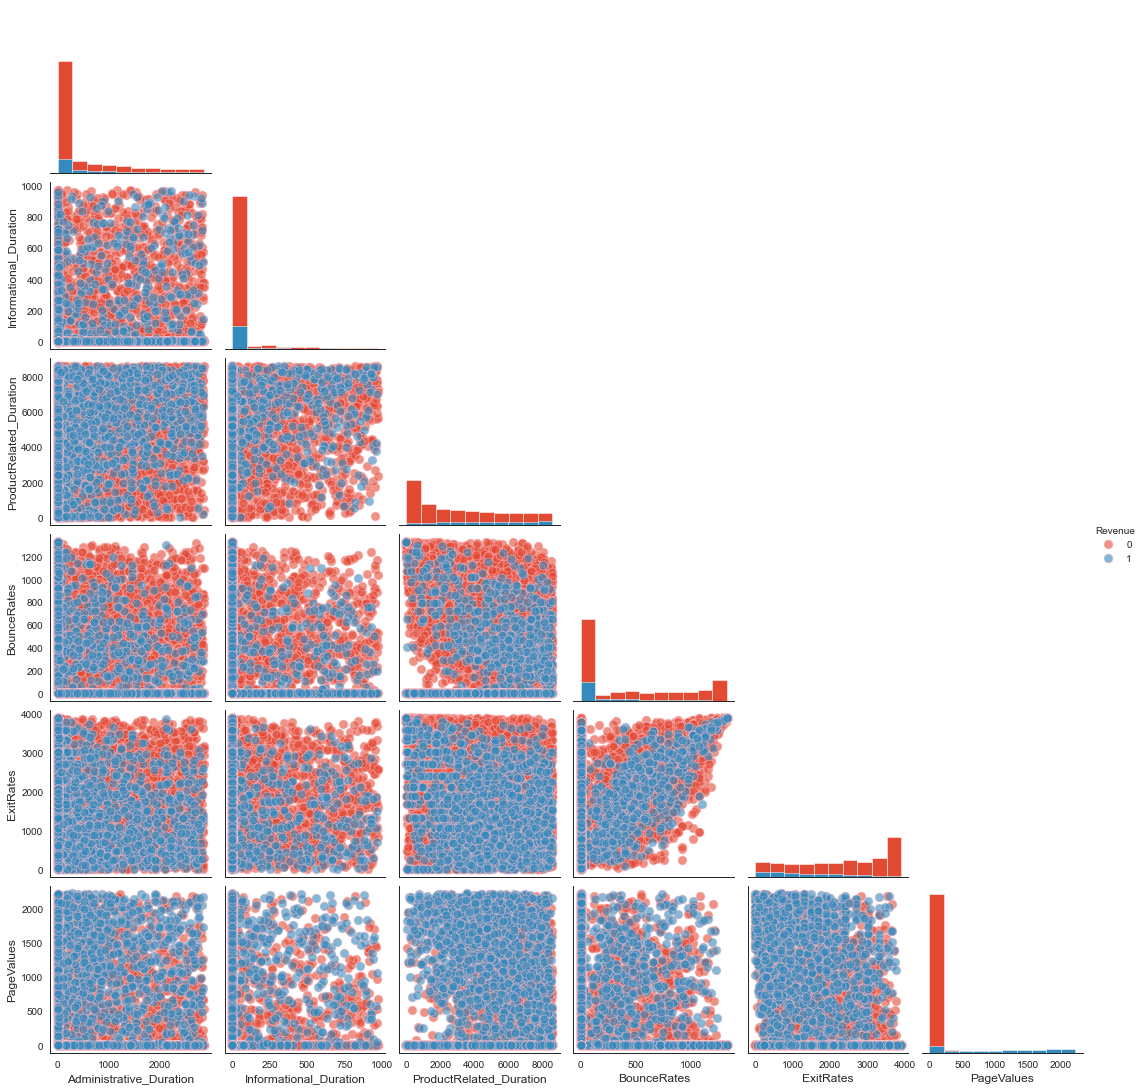

In [29]:
g = sns.pairplot(df
                 ,vars = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
                 ,hue = 'Revenue'
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'pink'}
                 ,corner=True)
plt.savefig('1.1.png')

### Executive Summary:

1. Bounce rates are strongly correlated with exit rates.
2. PageValue is one of the most significant features that lead to revenue.
3. The website gets most of its traffic from type 1,2 and 3.
4. Traffic type 2 yields the highest revenue of all channels. 
5. Traffic type 13 has a considerably high no. of sessions that do not generate revenue. 
6. From the above plots we can see that, the time spent by visitors pages are related to number of pages.
7. Returning visitors are checking to see if the prices of the products have changed. We can closely monitor the changes to these products.

### Statistical Analysis

### Feature Selection

<font color=blue>In order to focus on our target variable: Revenue, we first isolate the numerical variables into a dataframe called ``num_df``

In [108]:
num_df = df.iloc[:, list(range(10))]
num_df['Revenue'] = df['Revenue']
num_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False


>><font color=blue>Correlation states how the features are related to each other or the target variable.<br>
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)<br>
<b>Plotting a correlation matrix with heatmap makes it easy to identify which features are most related to the target variable. </b>

In [91]:
num_df_corr = num_df.corr()
num_df_corr
highlight = num_df_corr.round(2).style.background_gradient(cmap='coolwarm')
highlight

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
Administrative,1.000000,0.780000,0.320000,0.300000,0.380000,0.340000,-0.160000,-0.330000,0.170000,0.110000
Administrative_Duration,0.780000,1.000000,0.290000,0.270000,0.280000,0.320000,-0.150000,-0.320000,0.170000,0.110000
Informational,0.320000,0.290000,1.000000,0.790000,0.260000,0.260000,-0.040000,-0.130000,0.090000,0.070000
Informational_Duration,0.300000,0.270000,0.790000,1.000000,0.230000,0.240000,-0.050000,-0.140000,0.110000,0.080000
ProductRelated,0.380000,0.280000,0.260000,0.230000,1.000000,0.760000,-0.120000,-0.380000,0.150000,0.120000
ProductRelated_Duration,0.340000,0.320000,0.260000,0.240000,0.760000,1.000000,-0.150000,-0.410000,0.230000,0.180000
BounceRates,-0.160000,-0.150000,-0.040000,-0.050000,-0.120000,-0.150000,1.000000,0.640000,-0.170000,-0.170000
ExitRates,-0.330000,-0.320000,-0.130000,-0.140000,-0.380000,-0.410000,0.640000,1.000000,-0.280000,-0.240000
PageValues,0.170000,0.170000,0.090000,0.110000,0.150000,0.230000,-0.170000,-0.280000,1.000000,0.640000
Revenue,0.110000,0.110000,0.070000,0.080000,0.120000,0.180000,-0.170000,-0.240000,0.640000,1.000000


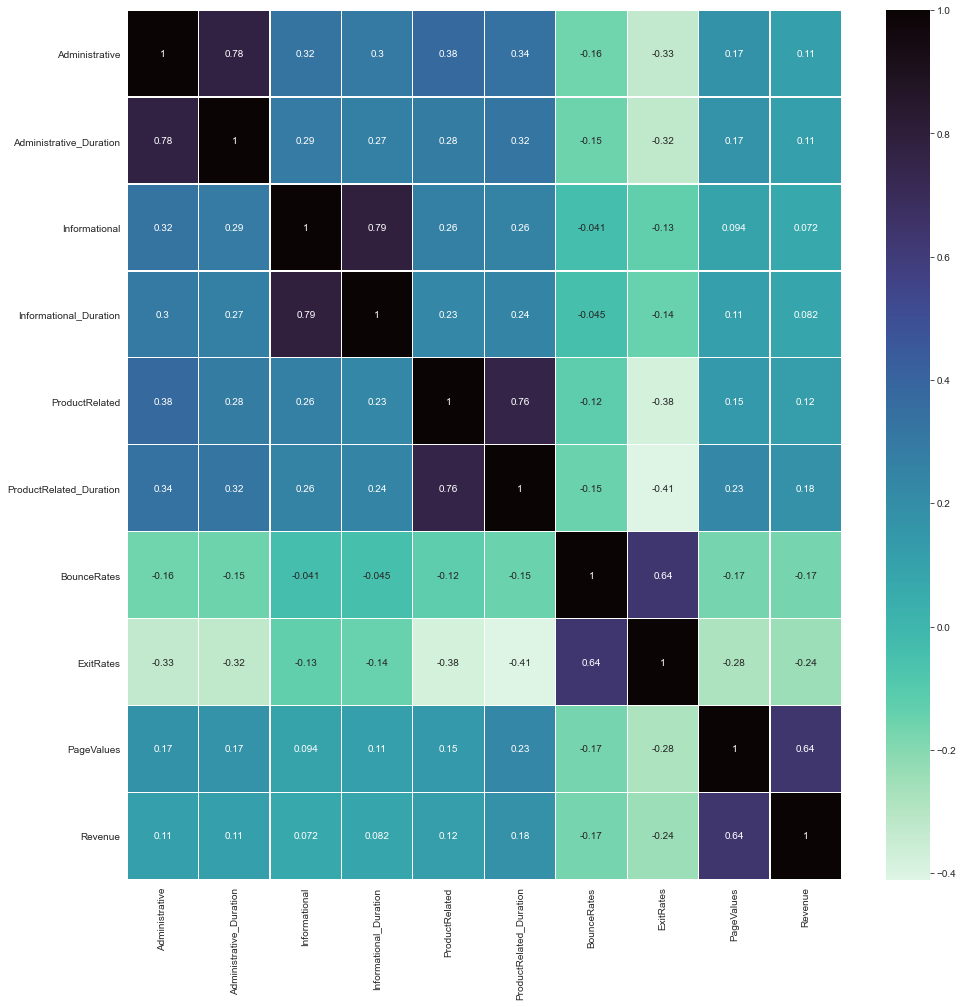

In [92]:
#create the correlation matrix heat map
#Calculate the correlation coefficients

plt.figure(figsize=(16,16))
sns.heatmap(num_df.corr(),linewidths=.1,cmap="mako_r", annot=True)
plt.yticks(rotation=0);

><font color=blue> <b>Here we can infer that </b>``ExitRates`` <b>has strong positive correlation with</b> ``BounceRates`` <b>.</b><br>
The 3 page types and their duration have positive strong correlation. <br>
As expected, page value is highly correlated with revenue output at 0.62. <br> 

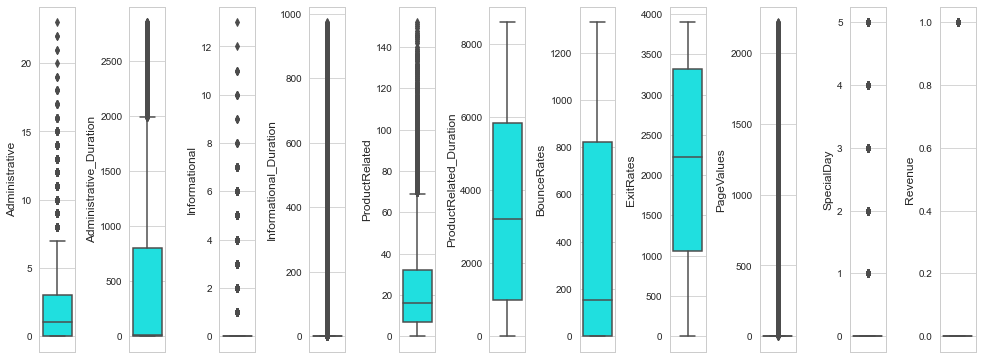

In [94]:
l = num_df.columns.values
col = 11
rows = len(l)-1/col
plt.figure(figsize=(1.25 * col, 5 * rows))
for i in range(0,len(l)):
    plt.subplot(rows + 1, col, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(num_df[l[i]],color='cyan',orient='v')
    plt.tight_layout()

>>Showing outlier all of columns

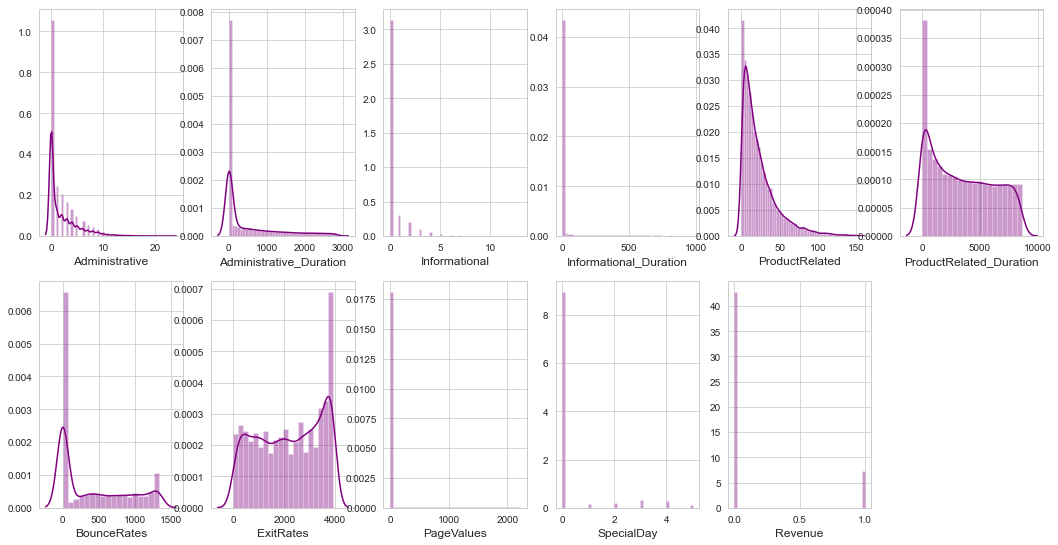

In [99]:
col = 6
rows = len(l)-1/col
plt.figure(figsize=(3 * col,5 * rows))
for i in range(0,len(l)):
    plt.subplot(rows + 1,col, i+1)
    sns.distplot(num_df[l[i]],kde=True, color='purple')

>><font color=blue>Most columns appear to be left skewed or Positive Skewness, where the data distribution of all columns in the e-commerce website is not normally distributed, and the average data distribution tends to approach the minimum value in each data itself.
    
>><font color=blue>Whereas for the ExitRates column, the data tends to be negative skeweness and right skewed. so that the data distribution approaches the maximum value in the ExitRates data. which can be interpreted as a visitor / consumer browsing the page (clicking or scrolling) on a web page and then deciding not to make a purchase and leaving the website page.

In [116]:
num_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
PageValues                 float64
SpecialDay                 float64
Revenue                       bool
dtype: object

In [118]:
dfn = num_df.drop(['Revenue'], axis=1)
dfn.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0
2,0,-1.0,0,-1.0,1,-1.000000,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.0,0.0


In [119]:
desc = dfn.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Administrative,11248.0,2.060900,2.990327,0.0,0.0,1.000000,3.000000,24.000000
Administrative_Duration,11248.0,70.976554,153.786119,-1.0,0.0,3.000000,83.000000,2156.166667
Informational,11248.0,0.404250,1.086500,0.0,0.0,0.000000,0.000000,16.000000
Informational_Duration,11248.0,25.529287,113.141315,-1.0,0.0,0.000000,0.000000,2252.033333
ProductRelated,11248.0,23.404161,23.353383,0.0,7.0,16.000000,32.000000,223.000000
ProductRelated_Duration,11248.0,798.703364,798.438874,-1.0,170.0,529.416667,1204.890179,3401.300000
PageValues,11248.0,5.844530,18.712484,0.0,0.0,0.000000,0.000000,361.763742
SpecialDay,11248.0,0.063371,0.201292,0.0,0.0,0.000000,0.000000,1.000000


In [122]:
desc['Mode'] = dfn.select_dtypes(include=[np.number]).mode().T
desc['Range'] = desc['max'] - desc['min']
desc['IQR'] = desc['75%'] - desc['25%']
desc['variance'] = dfn.var().tolist()
desc

,count,mean,std,min,25%,50%,75%,max,Mode,Range,IQR,variance
Administrative,11248.0,2.060900,2.990327,0.0,0.0,1.000000,3.000000,24.000000,0.0,24.000000,3.000000,8.942054
Administrative_Duration,11248.0,70.976554,153.786119,-1.0,0.0,3.000000,83.000000,2156.166667,0.0,2157.166667,83.000000,23650.170463
Informational,11248.0,0.404250,1.086500,0.0,0.0,0.000000,0.000000,16.000000,0.0,16.000000,0.000000,1.180482
Informational_Duration,11248.0,25.529287,113.141315,-1.0,0.0,0.000000,0.000000,2252.033333,0.0,2253.033333,0.000000,12800.957064
ProductRelated,11248.0,23.404161,23.353383,0.0,7.0,16.000000,32.000000,223.000000,1.0,223.000000,25.000000,545.380518
ProductRelated_Duration,11248.0,798.703364,798.438874,-1.0,170.0,529.416667,1204.890179,3401.300000,0.0,3402.300000,1034.890179,637504.636065
PageValues,11248.0,5.844530,18.712484,0.0,0.0,0.000000,0.000000,361.763742,0.0,361.763742,0.000000,350.157060
SpecialDay,11248.0,0.063371,0.201292,0.0,0.0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.040518


**Berdasarkan data di atas berikut penjelasannya:** 

<span style='color:Indianred'>*1. Mean, Median, dan Modus*</span>

>**Mean : Nilai rata-rata pada kolom Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah: 2.060900, 70.976554, 0.404250, 25.529287, 23.404161, 798.703364, 5.844530, 0.063371**

>yang berarti:

>>1. Untuk Administrative, rata-rata jumlah kunjungan visitor pada pages website yang berbeda mengenai account management adalah sebesar sekitar 2 kali.
>>2. Untuk Administrative_Duration, rata-rata total waktu (detik) yang dihabiskan oleh visitor/customer pada account management related pages adalah sebesar 70 detik.
>>3. Untuk Informational, rata-rata jumlah kunjungan visitor pada pages website yang berbeda mengenai communication and address indormation adalah sebesar 0.4 kali.
>>4. Untuk Informational_Duration, rata-rata total waktu (detik) yang dihabiskan oleh visitor/customer pada information related pages adalah sebesar 25 detik.
>>5. Untuk ProductRelated, rata-rata jumlah kunjungan visitor pada pages website yang berbeda mengenai informasi produk adalah sebesar 23 kali.
>>6. Untuk ProductRelated_Duration, rata-rata total waktu (detik) yang dihabiskan oleh visitor/customer pada product related pages adalah sebesar 798 detik.
>>7. Untuk PageValues, nilai rata-rata dari average value for a web page yang user/visitor/customer kunjungi sebelum melengkapi e-commerce transaction adalah sebesar 5.
>>8. Untuk Special Day, nilai rata-rata dari adanya hari spesial adalah sebesar 0.06.


>**Median : Nilai tengah pada kolom Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 1, 3, 0, 0, 16, 529, 0, 0.**
>yang berarti:
>>1. untuk Administrative, jika data diurutkan dari jumlah kunjungan visitor mengenai account management terkecil sampai terbesar, nilai tengah Administrative adalah 1.
>>2. untuk Administrative_Duration, jika data diurutkan dari waktu (detik) yang dihabiskan oleh visitor terkecil sampai terbesar, nilai tengah Administrative_Duration adalah 3.
>>3. untuk Informational, jika data diurutkan dari jumlah kunjungan visitor pada pages website yang berbeda mengenai communication and address indormation terkecil sampai terbesar, adalah sebesar 0.
>>4. untuk Informational_Duration, jika data diurutkan dari total waktu (detik) yang dihabiskan oleh visitor/customer pada information related pages terkecil sampai terbesar, nilai tengahnya adalah  0.
>>5. untuk ProductRelated, jika data diurutkan dari jumlah kunjungan visitor pada pages website yang berbeda mengenai informasi produk terkecil sampai terbesar, nilai tengahnya adalah 16.
>>6. untuk ProductRelated_Duration, jika data diurutkan dari range total waktu (detik) yang dihabiskan oleh visitor/customer pada product related pages terkecil sampai terbesar, nilai tengah harga rumah adalah sebesar 529.
>>7. untuk PageValues, jika data diurutkan dari average value for a web page yang user/visitor/customer kunjungi sebelum melengkapi e-commerce transaction terkecil sampai terbesar, nilai tengahnya adalah 0.
>>8. untuk Special Day, jika data diurutkan dari hari spesial terkecil sampai terbesar, nilai tengahnya adalah sebesar 0.
    
    
> **Modus :Nilai Modus pada kolom Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 0 kecuali ProductRelated**
> yang berarti:
>> untuk seluruh features kecuali ProductRelated, values yang paling banyak muncul adalah null value(0)

<span style='color:Indianred'>*2. Range, Q1, Q3, dan IQR*</span>

> **Range : Selisih nilai terbesar dan terkcil pada kolom Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah: 24, 2157, 16, 2253, 223, 3402, 361, 1**
> yang berarti:

>>1. untuk Administrative, range jumlah kunjungan visitor mengenai account management adalah 24.
>>2. untuk Administrative_Duration, range waktu (detik) yang dihabiskan oleh visitor adalah 2157.
>>3. untuk Informational, range jumlah kunjungan visitor pada pages website yang berbeda mengenai communication and address indormation adalah 16.
>>4. untuk Informational_Duration, range total waktu (detik) yang dihabiskan oleh visitor/customer pada information related pages adalah  2253.
>>5. untuk ProductRelated, range jumlah kunjungan visitor pada pages website yang berbeda mengenai informasi produk adalah 223.
>>6. untuk ProductRelated_Duration, range total waktu (detik) yang dihabiskan oleh visitor/customer pada product related pages adalah sebesar 3402.
>>7. untuk PageValues, range average value for a web page yang user/visitor/customer kunjungi sebelum melengkapi e-commerce transaction adalah 361.
>>8. untuk Special Day, range hari spesial adalah sebesar 1.

> **Q1 : Nilai tengah dari 25% jumlah data (di bawah nilai Median (50%)) pada kolom Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 0 kecuali ProductRelated dan ProductRelated_Duration**
> yang berarti:
>> untuk seluruh features kecuali ProductRelated dan ProductRelated_Duration, Quartil pertama adalah null value(0).

> **Q3 : Nilai tengah dari 75% jumlah data, (di atas nilai Median (50%)) Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 3, 83, 0, 0, 32, 1204, 0, 0**
> yang berarti:

>>1. untuk Administrative, Quartil ketiga jumlah kunjungan visitor mengenai account management adalah 3.
>>2. untuk Administrative_Duration, Quartil ketiga waktu (detik) yang dihabiskan oleh visitor adalah 83.
>>3. untuk Informational, Quartil ketiga jumlah kunjungan visitor pada pages website yang berbeda mengenai communication and address indormation adalah 0.
>>4. untuk Informational_Duration, Quartil ketiga total waktu (detik) yang dihabiskan oleh visitor/customer pada information related pages adalah  0.
>>5. untuk ProductRelated, Quartil ketiga jumlah kunjungan visitor pada pages website yang berbeda mengenai informasi produk adalah 32.
>>6. untuk ProductRelated_Duration, Quartil ketiga total waktu (detik) yang dihabiskan oleh visitor/customer pada product related pages adalah sebesar 1204.
>>7. untuk PageValues, Quartil ketiga average value for a web page yang user/visitor/customer kunjungi sebelum melengkapi e-commerce transaction adalah 0.
>>8. untuk Special Day, Quartil ketiga hari spesial adalah sebesar 0.

> **IQR : Jumlah nilai dimana 50% dari jumlah data pada kolom Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 3, 83, 0, 0, 25, 1304, 0, 0**
> yang berarti:

>>1. untuk Administrative, IQR jumlah kunjungan visitor mengenai account management adalah 3.
>>2. untuk Administrative_Duration, IQR waktu (detik) yang dihabiskan oleh visitor adalah 83.
>>3. untuk Informational, IQR jumlah kunjungan visitor pada pages website yang berbeda mengenai communication and address indormation adalah 0.
>>4. untuk Informational_Duration, IQR total waktu (detik) yang dihabiskan oleh visitor/customer pada information related pages adalah  0.
>>5. untuk ProductRelated, IQR jumlah kunjungan visitor pada pages website yang berbeda mengenai informasi produk adalah 32.
>>6. untuk ProductRelated_Duration, IQR total waktu (detik) yang dihabiskan oleh visitor/customer pada product related pages adalah sebesar 1304.
>>7. untuk PageValues, IQR average value for a web page yang user/visitor/customer kunjungi sebelum melengkapi e-commerce transaction adalah 0.
>>8. untuk Special Day, IQR hari spesial adalah sebesar 0.

<span style='color:Indianred'>*3. Standard Deviasi dan Variance*</span>

> **Standard Deviasi : Merupakan alat pengukur seberapa jauh nilai mean dari dataset, dan dimanfaatkan untuk melihat apakah sampel data yang diambil mewakili seluruh populasi**
>>Masing - masing nilai standar deviasi pada kolom Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah 2.9, 153, 1, 113, 23, 798, 18, 0.2 .
>> Berdasarkan hasil standar deviasi ketiganya tersebut, terlihat jelas jika standar deviasinya memiliki variasi dan cukup jauh dari rata-ratanya.
>> Sehingga, dapat diartikan semua kolom tersebut memiliki sebaran data yang beragam.

> **Variance : Nilai Keragaman dari suatu data**
>> Masing - masing nilai varians pada kolom Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, dan SpecialDay masing-masing berurutan adalah: 8.9, 23650, 1.18, 12800, 545, 6374504, 350, 0.04.
>> Berdasarkan hasil varians semua kolom tersebut, terlihat jauh menyimpang dari nilai rata-ratanya
>>Sehingga, dapat diartikan semua kolom tersebut memiliki sebaran data yang sangat beragam.

